In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, poisson

# Probability Mass Function (PMF) and Probability Density Function (PDF) 

In [2]:
# x is a discrete random variable (RV)
x = np.array([1, 2, 3, 4, 5])
p = np.array([0.2, 0.2, 0.3, 0.1, 0.2])
assert np.sum(p) == 1., "Sum of probabilities must be equal to 1!"

A few values of x: [24.  24.5 25.  25.5]
and corresponding y = p(X=x): [1.85289299e-05 0.00000000e+00 3.70578598e-05 0.00000000e+00]
0.9999999996799859


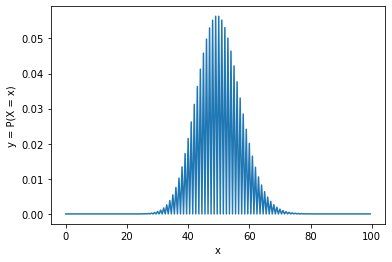

In [3]:
# x is a discrete (here, Poisson) RV 

# Poisson RV:  the probability of a given number of events occurring in a fixed interval of time or space
# if these events occur with a known constant mean rate and independently of the time since the last event

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=poisson#scipy.stats.poisson
x = np.arange(0, 100, 0.5)
y = poisson.pmf(x, mu=50) # probability mass function - for discrete RVs

print(f'A few values of x: {x[48:52]}')
print(f'and corresponding y = p(X=x): {y[48:52]}')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y = P(X = x)')

print(np.sum(y))

0.9997737463238228


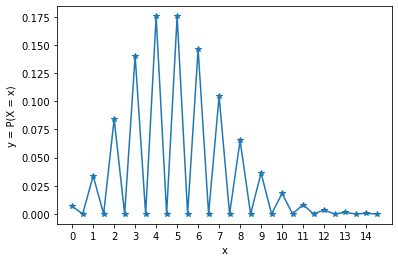

In [4]:
# And an example where these probabilities are visible better
x = np.arange(0, 15, 0.5)
y = poisson.pmf(x, mu=5) # probability mass function - for discrete RVs


plt.plot(x, y, '*-')
plt.xlabel('x')
plt.ylabel('y = P(X = x)')
plt.xticks(np.arange(0, 15))

print(np.sum(y))

9.899995686339823
0.9999994141030614


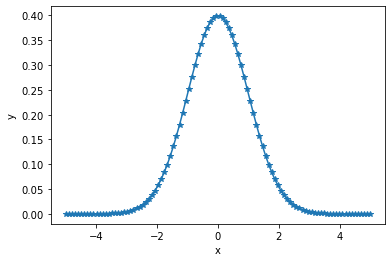

In [5]:
# x is a continuous random variable 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html?highlight=multivariat

x = np.linspace(start=-5, stop=5, num=100) 
y = multivariate_normal.pdf(x) # probability density function - for continuous RVs
# print(y)

plt.plot(x, y, '*-')
plt.xlabel('x')
plt.ylabel('y')

print(np.sum(y)) # will not equal to 1, because... 
print(np.trapz(y, x=x)) # The integral p(x)dx = 1 (the area under the curve equals to 1).

# Gaussian Mixture Model and the Expectation-Maximization (EM) algorithm

In [6]:
from sklearn.mixture import GaussianMixture

(200, 2)
Idx of starting points:  [119  11]
Starting points:  [[-0.75361164  1.        ]
 [ 1.30328603  0.        ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 'y')

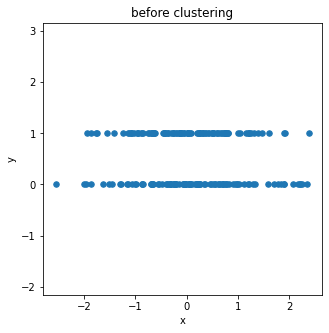

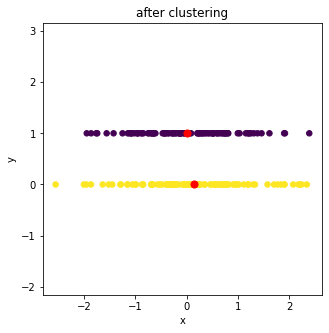

In [12]:
# Create horizontal data
N = 100

np.random.seed(200)

X = np.zeros((2*N, 2))
x, y = np.random.normal(0, 1, N), np.zeros(N)
X[:N, 0], X[:N, 1] = x, y

x, y = np.random.normal(0, 1, N), np.ones(N)
X[N:, 0], X[N:, 1] = x, y

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=30)
ax.axis('equal')
ax.set_title('before clustering')
ax.set_xlabel('x')
ax.set_ylabel('y')

print(X.shape)

gm = GaussianMixture(n_components=2, random_state=1) 

##### Comment/Uncomment the following 4 lines
rnd_starting_points_idx = np.random.choice(np.arange(2*N), size=2)
print('Idx of starting points: ', rnd_starting_points_idx)
print('Starting points: ', X[rnd_starting_points_idx, :])
gm.means_init = X[rnd_starting_points_idx, :]
#####

gm.fit(X)
means = gm.means_
labels = gm.predict(X)
print(labels)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=30, c=labels)
ax.scatter(means[:, 0], means[:, 1], c="r", s=50)
ax.axis('equal')
ax.set_title('after clustering')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
# Example copied from the previous session, original link:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
# Code changed -- Instead of KMeans(n_clusters=n_c), we use GaussianMixture(n_components=n_c), with n_c = {2, 3}

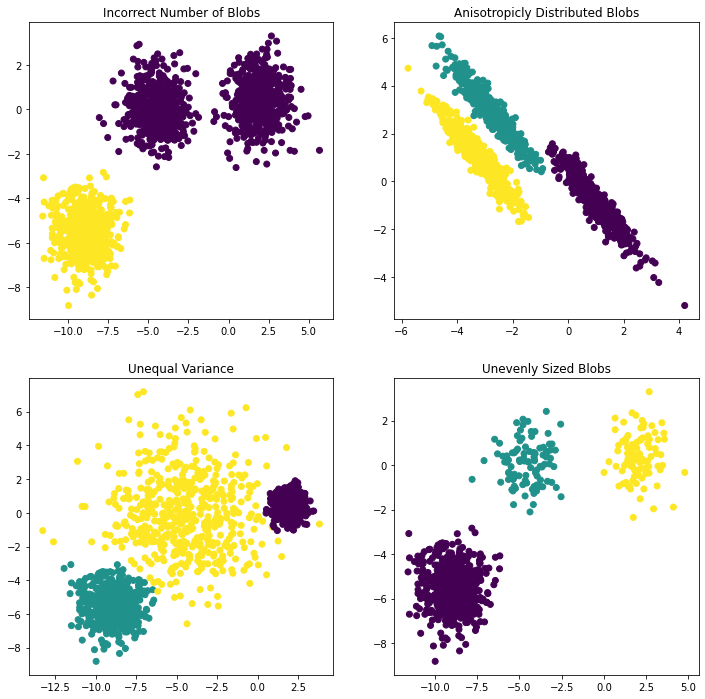

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state) # 3 centers (blobs) by default

# Incorrect number of components
y_pred = GaussianMixture(n_components=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])) 
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:100])) # and if the third cluster is bigger?
y_pred = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [181]:
# Uneven clusters. Ideally, the weights \pi will take care of uneven cluster size, but if there is a large
# difference, the EM will provide a suboptimal solution. 